**PROBLEM STATEMENT :**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

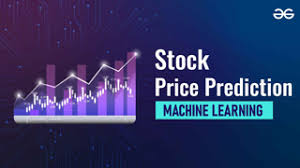

**INTRODUCTION:**

In the Indian financial community, Yes Bank is a well-known bank. It has been in the headlines since 2018 as a result of the Rana Kapoor fraud case. Due to this, it was intriguing to observe how it affected the company's stock prices and whether Time series models or other prediction models could adequately account for such circumstances. Since the bank's founding, this dataset has included closing, starting, highest, and lowest stock prices for each month.

**DATA DESCRIPTION:**

We have given the YES BANK stock price dataset which has the monthly stock price of the bank. In our dataset we have given multiple variables like date, open, high, low and close.

**Exploring the given features:**



*   The column open and close depicts us the starting and final price at which the stock is traded on a particular month.
*   High and low represents the maximum and minimum price of the shape for the month.


*   Date- date describes the date of investment done i.e in which month and year investment occurs.








Table of Content :



*   Data Wrangling
*   EDA Part


*  Building Regressor models
    
   1.   L2 regularisation(Lasso regularisation)
  2.   L1 regularisation(Ridge regularisation)



*   Evaluating regressor model
*   Conclusion 







In [ ]:
import numpy as np
import pandas as pd 
from numpy import math 
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 
import plotly.express as px 


import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import date , timedelta   
import holidays
from calendar import monthrange 


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/data_YesBank_StockPrices.csv')
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
len(dataset)

185

In [ ]:
dataset.shape

(185, 5)

In [ ]:
# Importing datetime 
from datetime import datetime
# converting date to proper format of date
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))



*   Here we are importing datetime so that we can convert the date in to proper format of date.We have given date in mmm-yy format then it converted in proper format of yyyy-mm-dd and given date column has dtype as object converting it into date time format.



In [ ]:
dataset.set_index('Date',inplace=True)
dataset.index.freq='MS'

In [ ]:
dataset.head(20)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
2005-12-01,13.49,14.44,13.00,13.71
2006-01-01,13.68,17.16,13.58,15.33
2006-02-01,15.50,16.97,15.40,16.12
2006-03-01,16.20,20.95,16.02,20.08


The profit or loss calculation is usually determined by the closing price of a stock for the month, hence we will consider the closing price as the target variable.

In [ ]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90




*   In this dataset, we have 185 rows with 5 columns. No null values Date column in object type so we have to convert it into datetime format.




In [ ]:
dataset.isnull()

,Open,High,Low,Close
Date,,,,
2005-07-01,False,False,False,False
2005-08-01,False,False,False,False
2005-09-01,False,False,False,False
2005-10-01,False,False,False,False
2005-11-01,False,False,False,False
...,...,...,...,...
2020-07-01,False,False,False,False
2020-08-01,False,False,False,False
2020-09-01,False,False,False,False


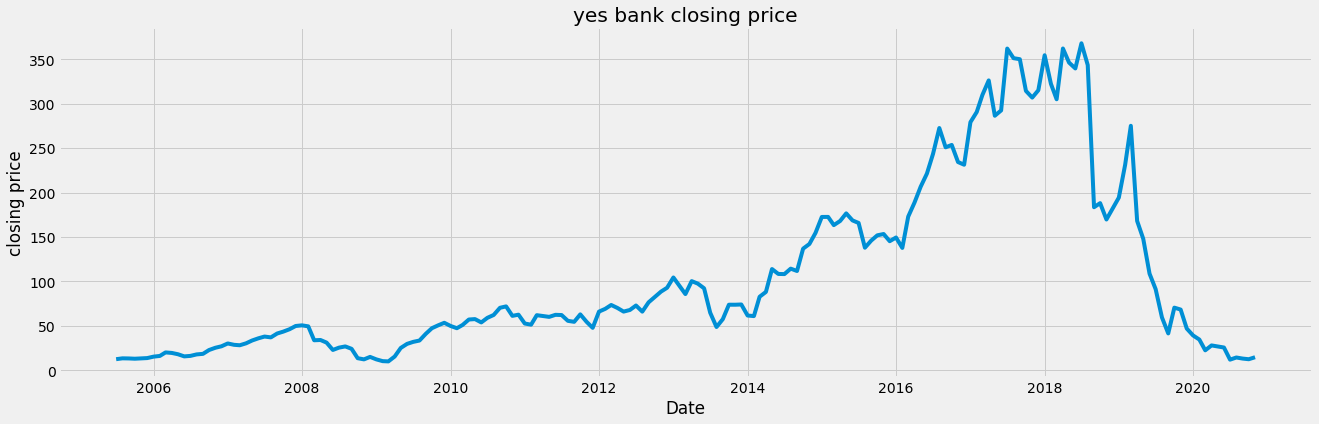

In [ ]:
# yes bank closing price 
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('closing price')
plt.plot(dataset['Close'])
plt.title('yes bank closing price')
plt.show()



*   Here in the above graph we can see that stock close prise decreased after year 2018 it is mainly because of Rana Kapoor case and hitted the stock price badly.




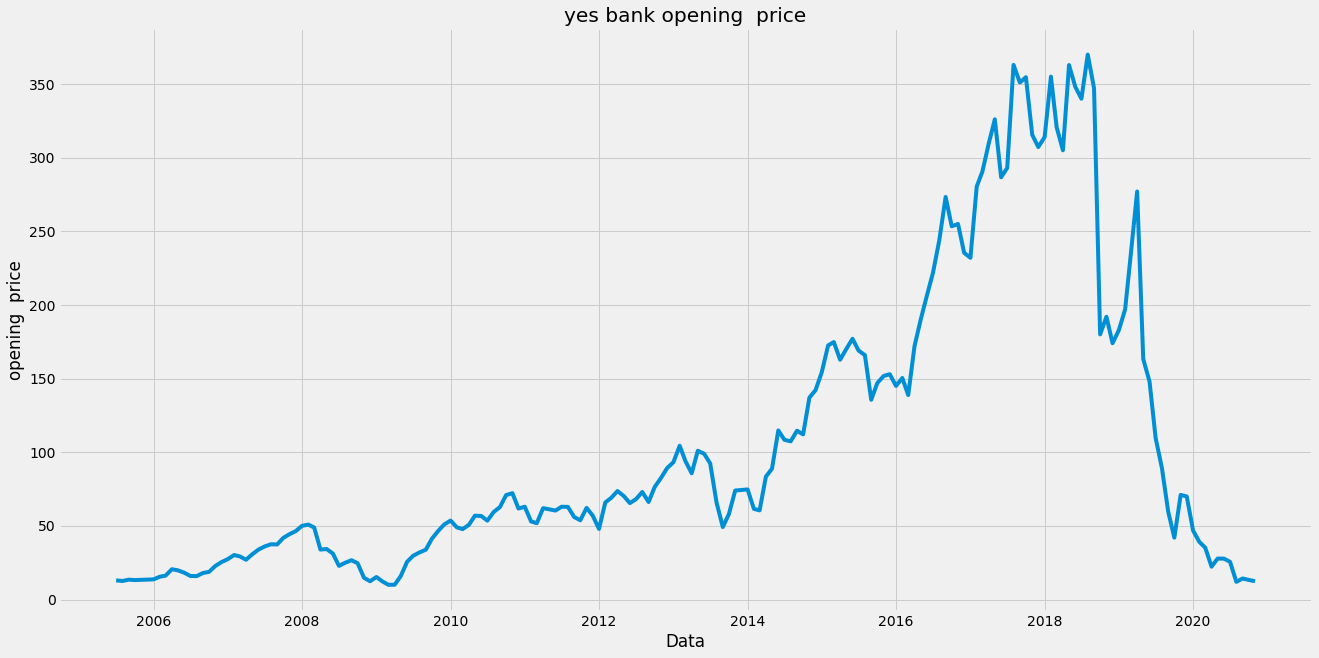

In [ ]:
# yes bank Opening price 
plt.figure(figsize=(20,10))
plt.xlabel('Data')
plt.ylabel('opening  price')
plt.plot(dataset['Open'])
plt.title('yes bank opening  price')
plt.show()



*   So here in this graph, we can observe that the graph for Yes bank opening price and Yes bank closing price has same result. Opening price also started increasing in year 2014 and it was at peak in year 2018. But after 2018 it started falling down contineously and came at 0 in year 2020 exactly same as Yes bank closing price.






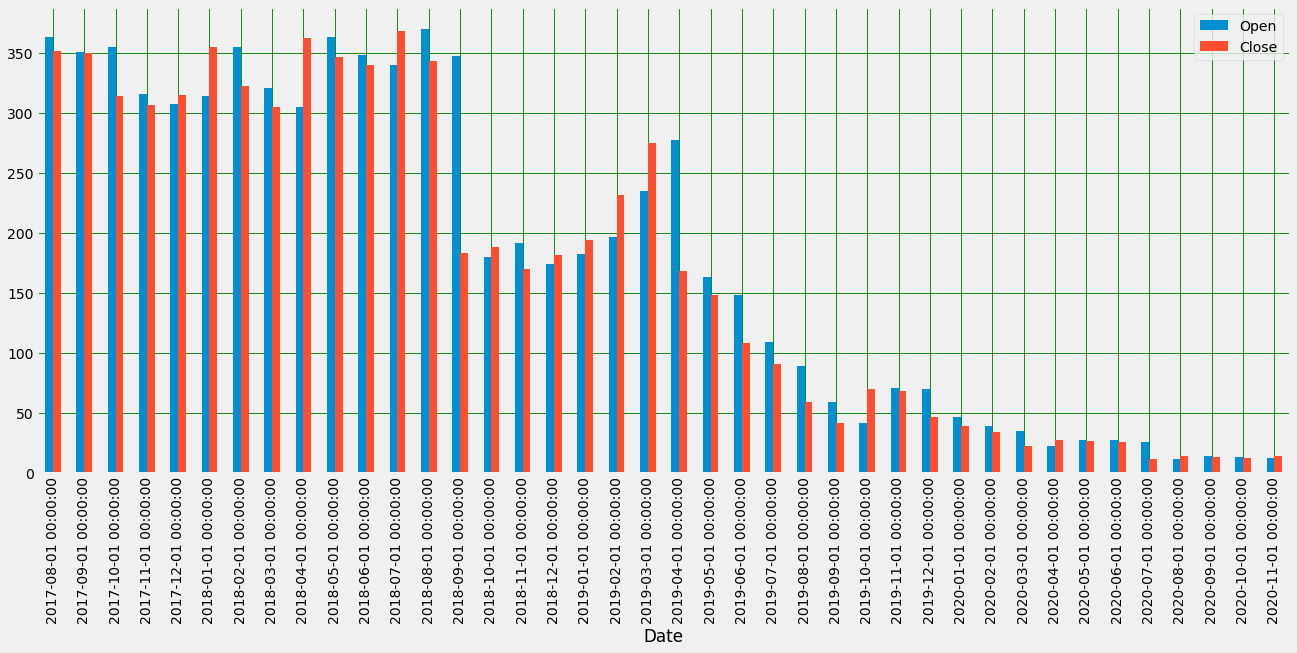

In [ ]:
#plot Open Vs Close 
dataset[['Open','Close']].tail(40).plot(kind='bar', figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth= '0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth= '0.9', color='yellow')
plt.show()




*  Here from the above graph we can conclude the point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money.



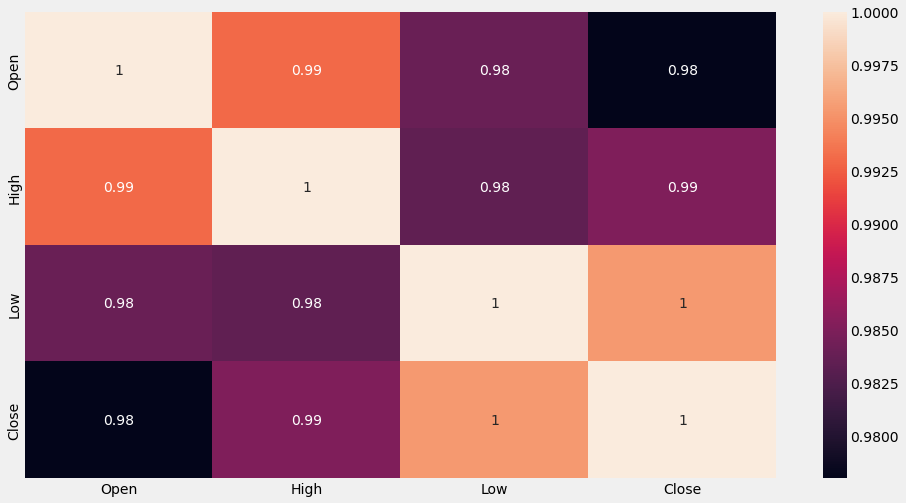

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot= True)



*   From the above heatmap we can conclude that all the features showing high correlation between each other.


*   There are several ways to handle multi-collinearity in the regression. Principal component analysis and ridge regression are popular used



*   We are going to do lasso and ridge regression for that.






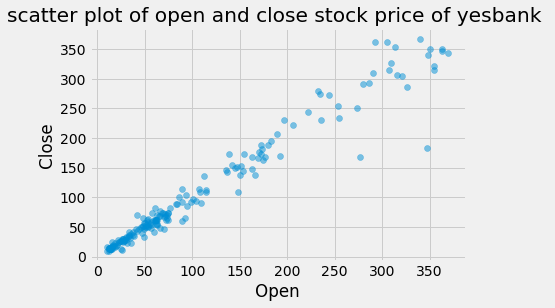

In [ ]:
plt.scatter(dataset['Open'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of open and close stock price of yesbank ')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

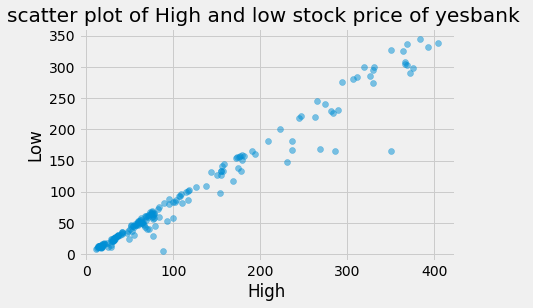

In [ ]:
plt.scatter(dataset['High'],dataset['Low'],alpha = 0.5)
plt.title('scatter plot of High and low stock price of yesbank ')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

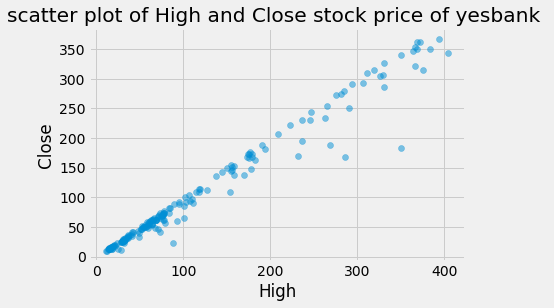

In [ ]:
plt.scatter(dataset['High'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of High and Close stock price of yesbank ')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

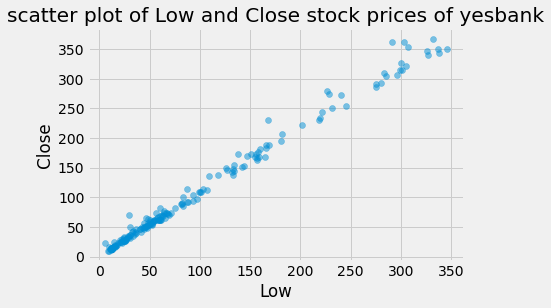

In [ ]:
plt.scatter(dataset['Low'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of Low and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()



* In all above scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features, and other features also shows correlation between each other.




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

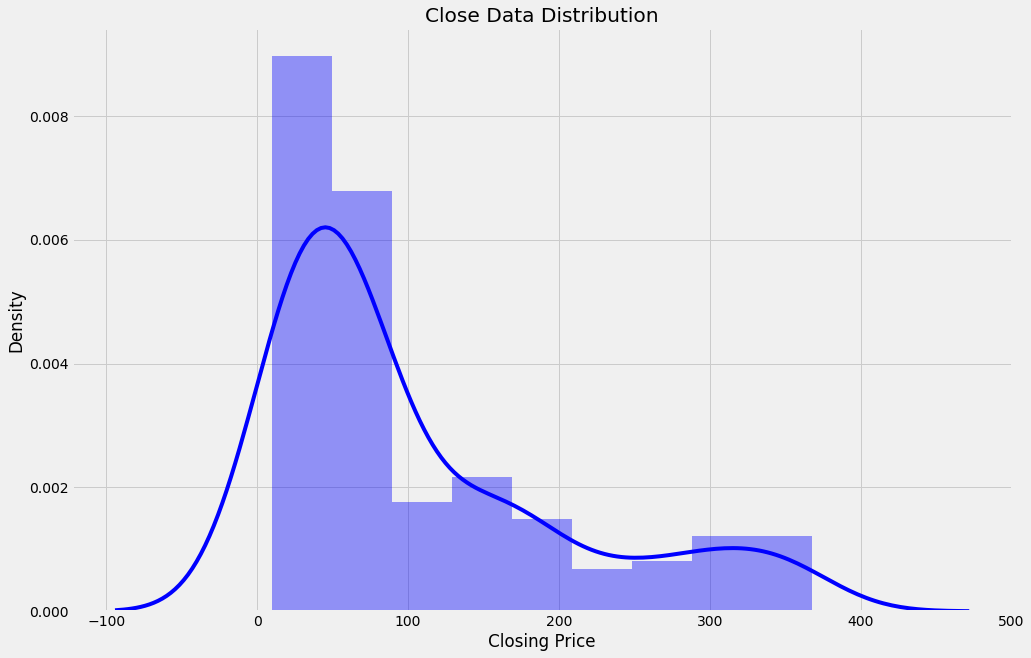

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

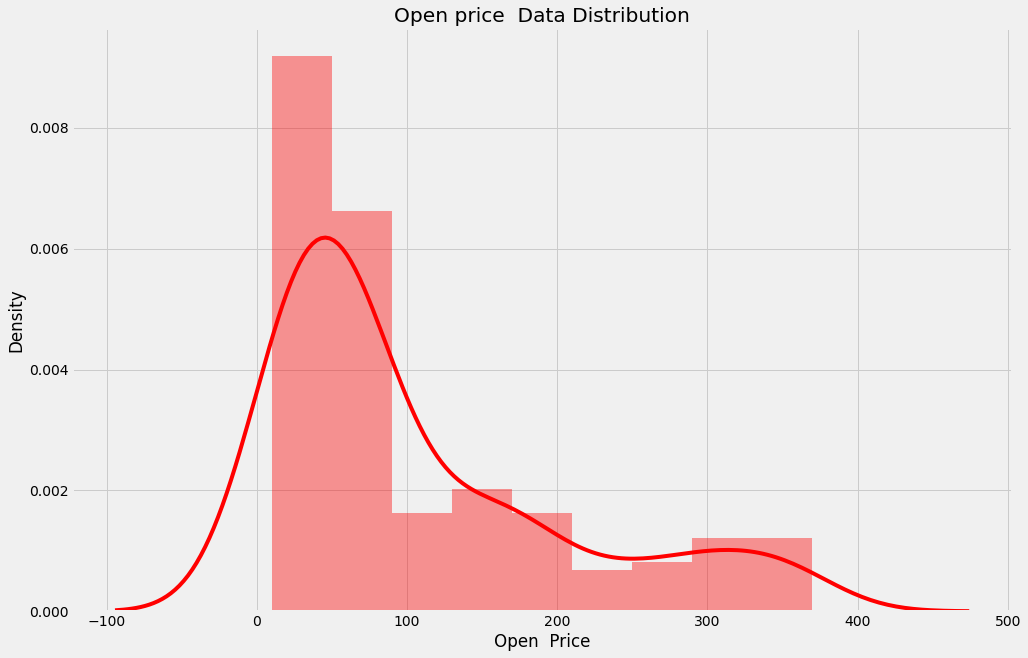

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Open'],color="r")
plt.title('Open price  Data Distribution')
plt.xlabel('Open  Price')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


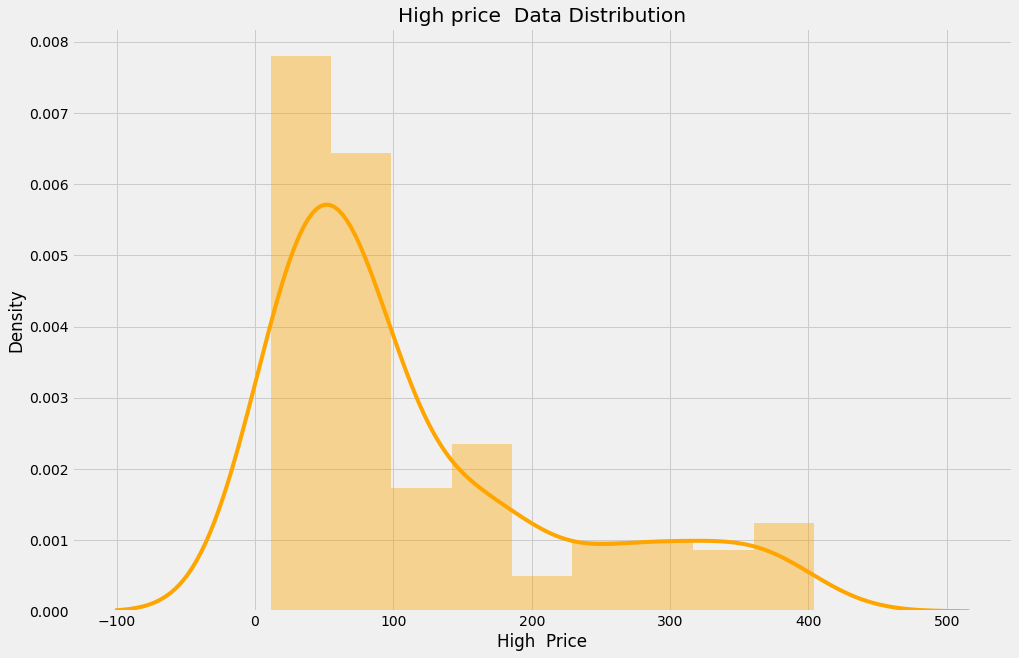

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['High'],color="Orange")
plt.title('High price  Data Distribution')
plt.xlabel('High  Price')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


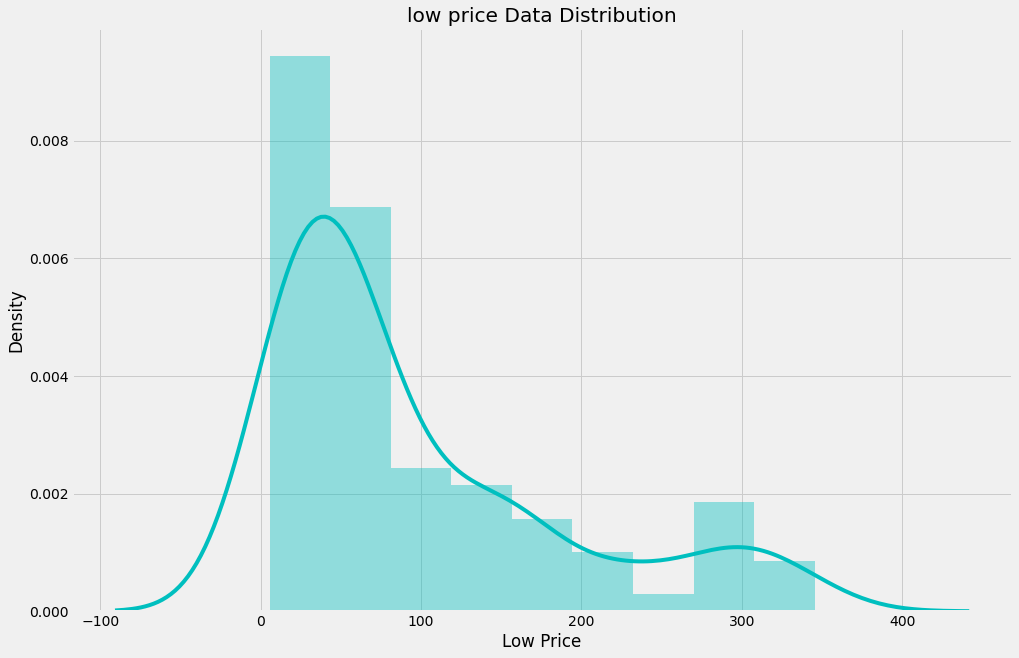

In [ ]:
plt.figure(figsize= (15,10))
sns.distplot(dataset['Low'], color="C")
plt.title('low price Data Distribution')
plt.xlabel('Low Price')
plt.show()

. Now ,We Can see in all histogram plot that they all are right skewed

# **DATA MODELING**

Here we are using Linear Regression machine learning algorithm for building our model.It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent variable and one or more independent variables, thats why it is called as linear regression.

In [ ]:
#Creating set of numrical features.
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')



*   Here we converted numerical data type int64 and float64 into object data type so that we can categorise these columns into dependent and independent variable.




In [ ]:
dependent_variable = 'Close' 



In [ ]:
independent_variables = list(set(dataset.columns.tolist())- {dependent_variable})

In [ ]:
independent_variables

['Open', 'High', 'Low']

In [ ]:

# Creating data of independent variable 
X= dataset[independent_variables].values

In [ ]:
# Creating data of dependent variable 
y= dataset[dependent_variable].values

In [ ]:
dataset[independent_variables]

,Open,High,Low
Date,,,
2005-07-01,13.00,14.00,11.25
2005-08-01,12.58,14.88,12.55
2005-09-01,13.48,14.87,12.27
2005-10-01,13.20,14.47,12.40
2005-11-01,13.35,13.88,12.88
...,...,...,...
2020-07-01,25.60,28.30,11.10
2020-08-01,12.00,17.16,11.85
2020-09-01,14.30,15.34,12.75


In [ ]:
# splitting the dataset into the training set and Test set
X_train, X_test, y_train , y_test = train_test_split(X, y , test_size = 0.20, random_state= 1) 

In [ ]:
X_train[:,0]

array([ 56.7 ,  62.9 , 169.  , 363.  , 170.  ,  25.4 ,  13.49, 189.8 ,
       135.61, 104.41,  56.94, 100.99, 150.4 , 347.2 , 180.  , 153.  ,
        68.15, 154.4 ,  24.6 ,  44.4 ,  10.  ,  93.2 ,  33.9 ,  41.2 ,
        27.4 ,  62.  ,  39.1 , 305.  ,  58.  ,  16.  , 151.73, 174.  ,
       147.95, 114.8 ,  71.  , 142.08,  15.9 , 177.  , 277.  ,  10.04,
       197.  ,  22.85, 315.5 ,  70.  , 355.  ,  89.2 , 114.6 ,  14.3 ,
        99.  , 192.  ,  53.8 ,  27.  ,  13.3 ,  13.48,  61.26,  73.  ,
       231.98,  13.68,  49.2 ,  13.  , 286.66,  57.  ,  61.8 ,  49.  ,
       137.1 ,  82.54, 253.41,  15.94,  62.8 ,  56.  ,  94.  , 354.6 ,
        42.  ,  76.4 ,  25.6 , 146.96,  19.8 ,  34.3 ,  48.9 , 320.7 ,
        26.68,  65.45,  27.8 ,  12.41,  41.8 ,  74.  ,  33.89,  61.54,
        53.  ,  20.56, 109.6 ,  60.52,  59.5 , 112.1 ,  46.9 ,  72.2 ,
        18.78,  12.4 , 314.  , 107.4 ,  69.  ,  46.58,  37.4 ,  62.2 ,
        12.19,  35.98,  13.2 ,  89.2 ,  31.98, 206.4 ,  35.2 ,  49.99,
      

In [ ]:
#Looking for shapes of traing and testing dataset 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [ ]:
#Applying linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predication 
y_pred=lr_model.predict(X_test)

In [ ]:
print('Coefficients:', lr_model.coef_)

Coefficients: [-0.49613547  0.52549199  0.99944007]


In [ ]:
print("Mean squared error : %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error : 19.99


In [ ]:
print('intercept:', lr_model.intercept_)

intercept: 1.48957553743341


In [ ]:
print("R2 score : %.2f" % metrics.r2_score(y_test,y_pred))

R2 score : 1.00


In [ ]:
print('Variance score: {}'.format(lr_model.score(X_test, y_test)))

Variance score: 0.9978412541225983


In [ ]:
print('adjusted R2:',1 - (1-lr_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

adjusted R2: 0.9949781468214299


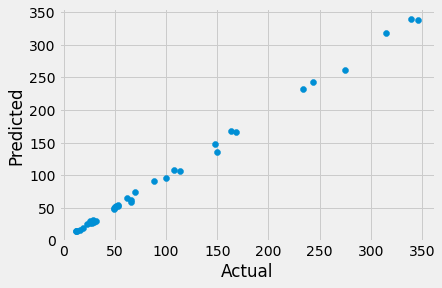

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

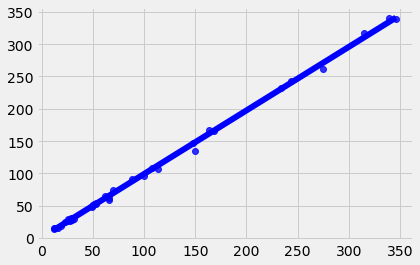

In [ ]:
sns.regplot(x=y_test,y=y_pred, ci=None, color ='blue');

RESIDUAL PLOT

We are ploting residual plot to evaluate the goodness of our fit for our regression model.

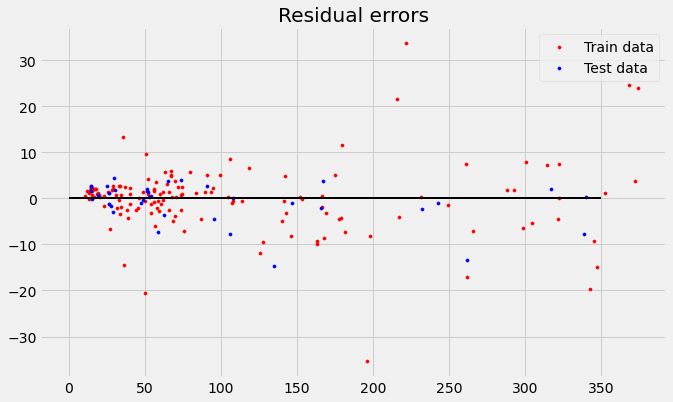

In [ ]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
# plottng resiudal errors in training data 
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train)- y_train, color = "red", s = 10, label = 'Train data') 

#plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test, color = "blue", s =10, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0 , xmax = 350, linewidth = 2 )

plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In [ ]:
# Applying Lasso Regression  model
lasso = Lasso(alpha=0.010, max_iter= 3000) 

# Fitting lasso model 
lasso.fit(X_train , y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
# predication for lasso model 
y_pred_1 = lasso.predict(X_test)

In [ ]:
#performance metrics
print("MSE :",mean_squared_error(y_test, y_pred_1))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_1)))
print("MAE :",mean_absolute_error(y_test, y_pred_1))
print("R2 :",metrics.r2_score(y_test, y_pred_1))

MSE : 19.990460839072686
RMSE : 4.471069317184949
MAE : 3.052925817759116
R2 : 0.9978410508420275




*   After applying lasso model we have R^2 value 99.7%. It indicates high accuracy of our model.

  



**CROSS VALIDATION:**

In cross validation we can perform our model on the new dataset or we can say test dataset.So that can check our model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
lasso = Lasso()
parametres = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.05, 1,5,10,20,30, 40,45, 50, 55, 60, 100]}
lasso_regressor = GridSearchCV(lasso, parametres, scoring= 'neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+03, tolerance: 1.040e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.216e+03, tolerance: 1.024e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print ("\nusing ", lasso_regressor.best_params_, "the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.1}

using  {'alpha': 0.1} the negative mean squared error is:  -59.37310100044369


In [ ]:
#predication 
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))

MSE : 20.00916567801092
RMSE : 4.473160591574029
MAE : 3.054640487105066
R2 : 0.9978390307387092




*   So the conclusion , the R squared value for the test data was 99.7% .This is almost same as in the score from the training dataset which proves that in a  dataset we achieve the best fit model .



**IMPLEMENTING RIDGE REGRESSION MODEL**

We are now applying Ridge Regularization we need to find the optimized penalty coefficient which is represented by alpha. The higher the alpha gets, the stronger becomes the penalty for coefficients

In [ ]:
from sklearn.linear_model import Ridge 
ridge  = Ridge()

In [ ]:
#fitting the model
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
#Score 
ridge.score(X_train,y_train)

0.9943947124229274

In [ ]:
#Prediction
y_pred_r = ridge.predict(X_test) 

In [ ]:
# Test performance 
print("MSE :", mean_squared_error(y_test, y_pred_r))
print("RMSE :", math.sqrt(mean_squared_error(y_test,y_pred_r)))
print ("MAE :", mean_absolute_error(y_test, y_pred_r))
print ("R2 :", metrics.r2_score(y_test,y_pred_r))

MSE : 19.98932452717223
RMSE : 4.4709422415383795
MAE : 3.0528133919460227
R2 : 0.9978411735625411


In [ ]:
# Hyperprarameter tuning 
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print ("The best fit alpha value is found out to be :" , ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -59.36153077121787


In [ ]:
#Model Prediction 
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 20.033724585680265
RMSE : 4.475904890151294
MAE : 3.055663076640082
R2 : 0.9978363784020042




*   After implementing the best parameters best R^2 score we have 99.78% for Ridge regression model.





**PERFORMANCE VISUALIZATION** 

In [ ]:
#Predication 
y_pred_1=lr_model.predict(X_test)



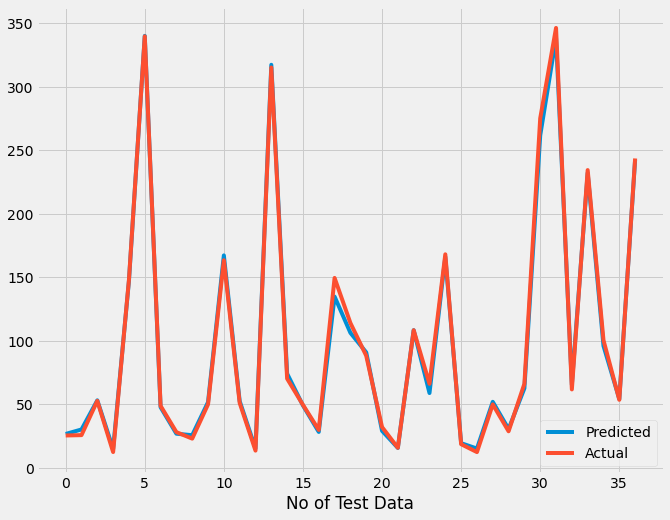

In [ ]:
#Linear regression model performance visualization
plt.figure(figsize= (10,8))
plt.plot(y_pred_1)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

From the above graph we can say that we achieve the almost best fit model for our dataset.

**INFERENCE:**



*  At first we do the data wrangling and then data cleaning and after that we do the EDA part .
*   In EDA part we conclude from our dataset that 
     
     * Stock close price decreases after year 2018 it is mainly because of Rana kapoor case and hitted the stock price badly. 
     * The garph for Yes bank opening price and Yes bank closing price has same result .
     * The point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money.
     * From scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features.
     * All histogram plot shows that all are right skewed.
     * From heatmap we can conclude that all the features showing high correlation between each other.
  

*  We implemented linear  regression and the accurancy of our linear regression model is 99.78%.  
*   After that we visualise the performance of our linear regression model and the graph shows that we achieve the almost best fit model for our dataset.







